# Importing required libraries

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import cohen_kappa_score
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingRegressor

!pip install --upgrade scikit-learn


# Gettting the Processed CSV to pandas dataframe

In [69]:
prep_df = pd.read_csv("Processed_data.csv")
prep_df.drop('Unnamed: 0',inplace=True,axis=1)
prep_df.head()

,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,1441,344,16,4.188953,11,76,75,18,24
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,1765,413,17,4.273608,21,98,84,20,19
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,1185,276,14,4.293478,5,76,51,20,16
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,31,142,96,39,29
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,2023,469,30,4.313433,18,110,90,32,36


# CountVectorizer splits the text data into 400 Columns with features ranging from unigrams to Trigrams 

In [70]:

vectorizer = CountVectorizer(max_features = 400, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()


# Here i collected the top 30 features which I derived from feature importance plots. 


In [71]:

X_full = np.concatenate((prep_df.iloc[:, 5:].values, X), axis=1)
y_full = prep_df['final_score'].values
selected_columns_indices = [161, 198, 319, 229, 212, 304, 357, 316, 249, 353, 339, 157, 48, 234, 257, 8, 390, 4, 7, 31, 6, 269, 71, 83, 5, 2, 1, 41, 3, 0]
X_full = X_full[:, selected_columns_indices]
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.3)


In [72]:
# ML model used is Random Forest Regressor

regressor = RandomForestRegressor(max_depth=150,n_estimators=250,
                                  random_state=42)
regressor.fit(X_train, y_train)





RandomForestRegressor(max_depth=150, n_estimators=250, random_state=42)

[2, 5, 0, 9, 3, 8, 4, 11, 13, 7, 14, 1, 6, 10, 19, 16, 12, 23, 22, 21, 17, 15, 18, 20, 24, 25, 26, 27, 28, 29]
2     0.005199
5     0.006475
0     0.006521
9     0.006709
3     0.006734
8     0.006883
4     0.006997
11    0.007575
13    0.007779
7     0.008029
14    0.008095
1     0.008814
6     0.010356
10    0.011497
19    0.013125
16    0.014021
12    0.015687
23    0.016683
22    0.018784
21    0.022153
17    0.024511
15    0.025985
18    0.027905
20    0.030238
24    0.039745
25    0.041261
26    0.046121
27    0.049411
28    0.082240
29    0.424464
dtype: float64
Mean squared error: 2.32
-------


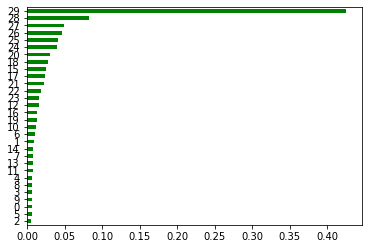

In [73]:
global_importances = pd.Series(regressor.feature_importances_, index=columns_list)
global_importances.sort_values(ascending=True, inplace=True)
top_30_features = global_importances.tail(30)

column_names_list = top_30_features.index.tolist()
print(column_names_list)
print(top_30_features)
top_30_features.plot.barh(color='green')
y_pred = regressor.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("-------")